NAMA : RIZKIATUL FAUZIAH

NIM : H071201089

PRODI : SISTEM INFORMASI

*PREDIKSI PENYAKIT KARDIOVASKULAR*

Penyakit kardiovaskular adalah penyebab kematian nomor 1 secara global, merenggut sekitar 17,9 juta nyawa setiap tahun, yang merupakan 31% dari semua kematian di seluruh dunia.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, pola makan yang tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya dengan menggunakan strategi populasi luas.


![https://www.udmi.net/wp-content/uploads/2020/02/UDMI_Cardiovascular-Disease.png](https://www.udmi.net/wp-content/uploads/2020/02/UDMI_Cardiovascular-Disease.png)




Import Library

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

Read Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/heart_failure_clinical_records_dataset.csv')
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (299, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 K

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


**VISUALIZING THE DATA
**

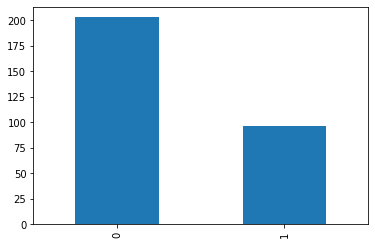

In [ ]:
# Distribution of DEATH_EVENT
data.DEATH_EVENT.value_counts()[0:30].plot(kind='bar')
plt.show()

# Plotting Heatmap
Heatmap dapat didefinisikan sebagai metode representasi grafis data numerik di mana titik data individual yang terkandung dalam matriks direpresentasikan menggunakan warna yang berbeda. Warna dalam heatmap dapat menunjukkan frekuensi suatu peristiwa, kinerja berbagai metrik dalam kumpulan data, dan seterusnya. Skema warna yang berbeda dipilih oleh berbagai bisnis untuk menyajikan data yang ingin diplot pada heatmap.

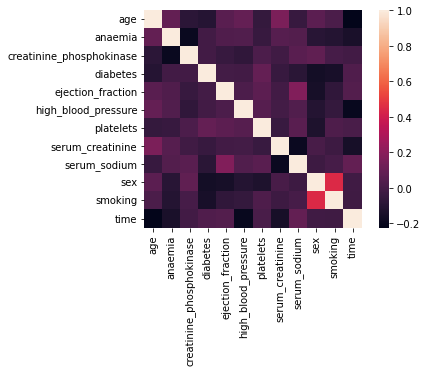

In [ ]:
data1 = data[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure',
'platelets','serum_creatinine','serum_sodium','sex','smoking','time']] #Mensubset Data
cor = data1.corr() #Hitung korelasi variabel-variabel di atas
sns.heatmap(cor, square = True) #Plot korelasinya sebagai heatmap

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


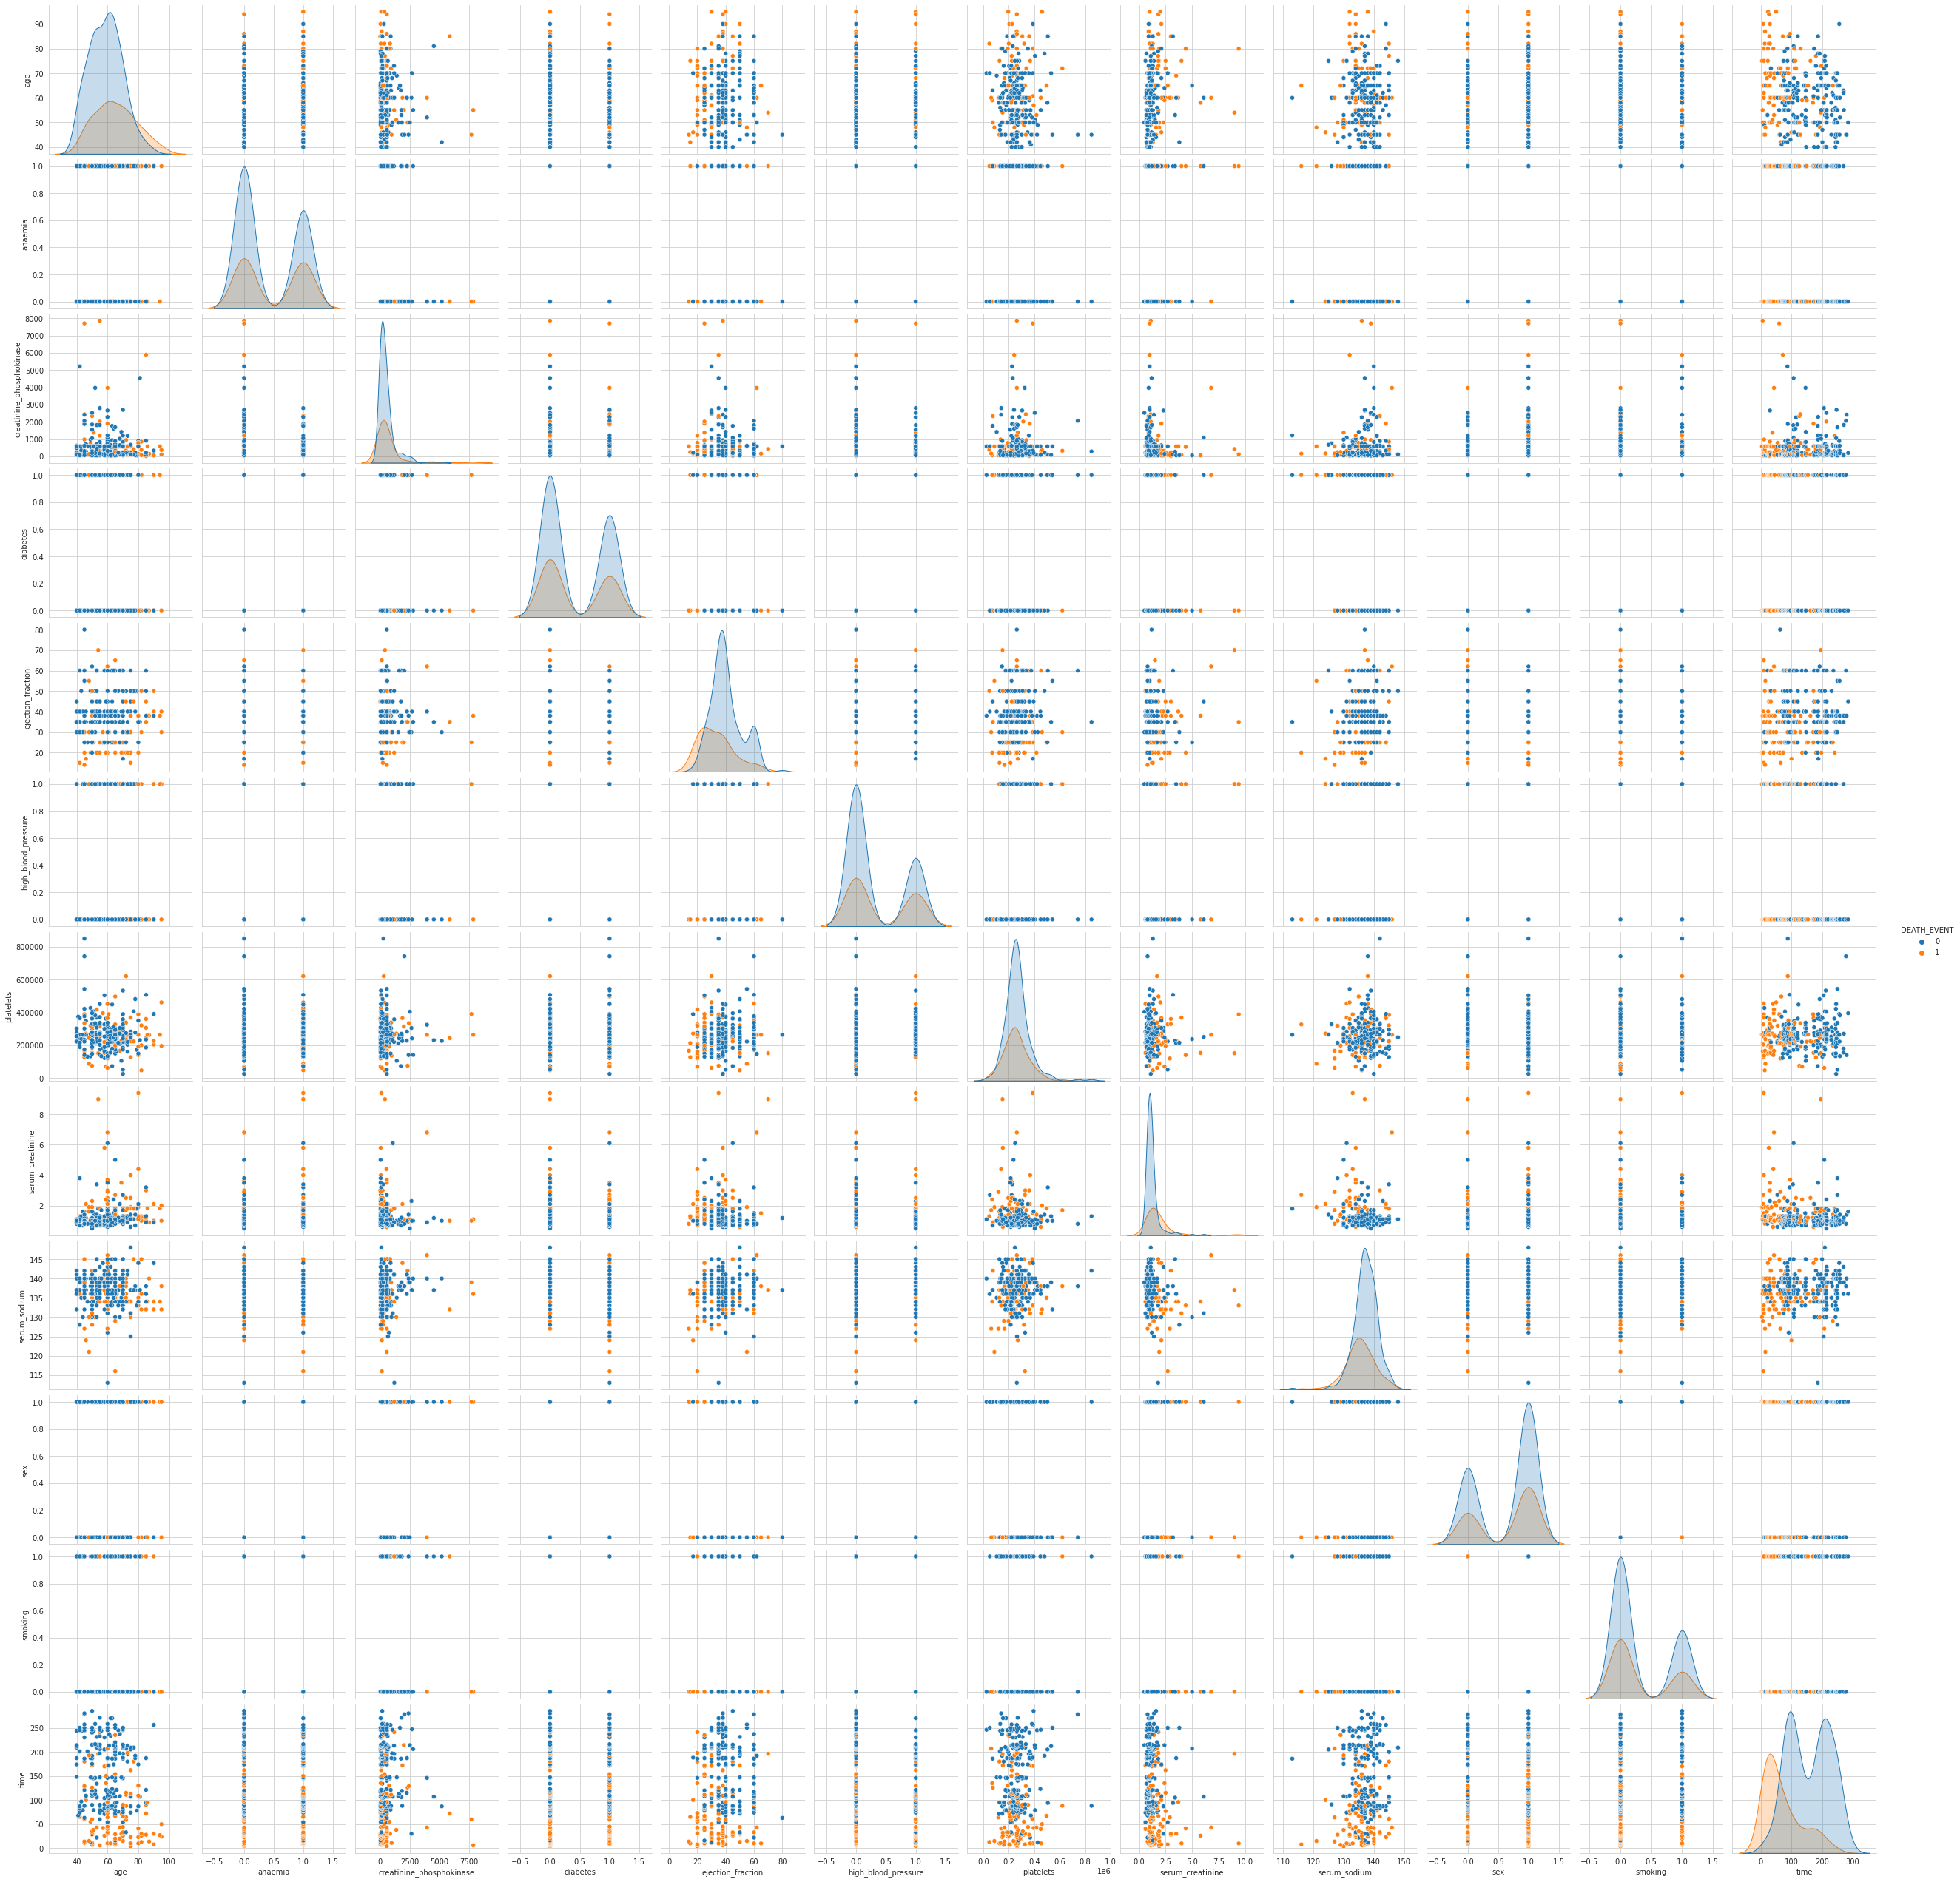

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="DEATH_EVENT",size=3);
plt.show()

# SPLITTING DATA
Data splitting atau pemisahan data adalah metode membagi data menjadi dua bagian atau lebih yang membentuk subhimpunan data. Umumnya, data splitting memisahkan dua bagian, bagian pertama digunakan untuk mengevaluasi atau uji data (testing) dan data lainnya digunakan untuk melatih model (training).
Untuk penelitian ini menggunakan ukuran sampel 5% (bertujuan untuk mengurangi efek overfitting).

In [ ]:
from sklearn.model_selection import train_test_split
Y = data['DEATH_EVENT']
X = data.drop(columns=['DEATH_EVENT'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=9)

In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (284, 12)
Y train shape:  (284,)
X test shape:  (15, 12)
Y test shape:  (15,)


# 1. Random forest classifier

Random Forest Classification adalah estimator meta yang cocok dengan sejumlah pengklasifikasi pohon keputusan pada berbagai sub-sampel dari kumpulan data dan menggunakan rata-rata untuk meningkatkan akurasi prediksi dan kontrol over-fitting

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

# Mendefinisikan Model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# Train Model
rfcla.fit(X_train, Y_train)

# Memprediksi Nilai Target
Y_predict5 = rfcla.predict(X_test)

In [ ]:
test_acc_rfcla = round(rfcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [ ]:
model1 = pd.DataFrame({
    'Model': ['Random Forest'],
    'Train Score': [train_acc_rfcla],
    'Test Score': [test_acc_rfcla]
})
model1.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,100.0,100.0


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict5)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


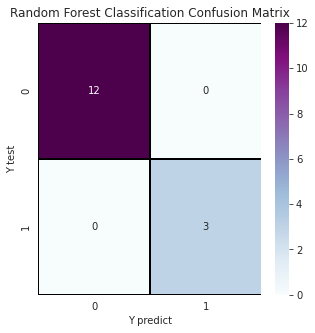

In [ ]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# 2. Support Vector Machine 

Support Vector Machine (SVM) merupakan salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi (seperti Support Vector Classification) dan regresi (Support Vector Regression). Dalam pemodelan klasifikasi, SVM memiliki konsep yang lebih matang dan lebih jelas secara matematis dibandingkan dengan teknik-teknik klasifikasi lainnya. SVM juga dapat mengatasi masalah klasifikasi dan regresi dengan linear maupun non linear.
Tujuan SVM adalah menemukan hyperplane dalam ruang N-dimensi yang mengklasifikasikan titik data dengan jelas. Jadi hyperplanes adalah batas keputusan yang membantu mengklasifikasikan titik data. Poin data yang jatuh di kedua sisi hyperplane dapat dikaitkan dengan kelas yang berbeda.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Mendefinisikan SVM Model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# Train Model
svmcla.fit(X_train, Y_train)

# Memprediksi Nilai Target
Y_predict2 = svmcla.predict(X_test)

In [ ]:
test_acc_svm = round(svmcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_svm = round(svmcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [ ]:
model2 = pd.DataFrame({
    'Model': ['SVM'],
    'Train Score': [train_acc_svm],
    'Test Score': [test_acc_svm]
})
model2.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,SVM,67.25,80.0


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict2)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.20


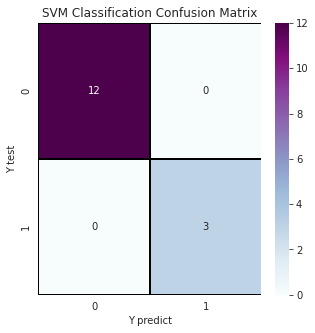

In [ ]:
# The confusion matrix
svm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svm, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap="BuPu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

# Features Selection

In [ ]:
Y1 = data['DEATH_EVENT']
X1 = data.drop(columns=['age','anaemia','diabetes','high_blood_pressure'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['ejection_fraction', 'serum_sodium', 'time', 'DEATH_EVENT']
4


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


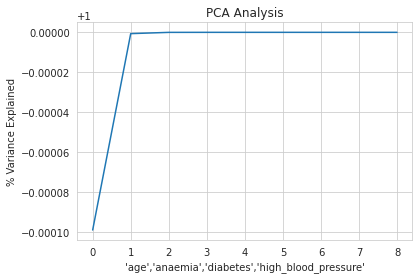

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("'age','anaemia','diabetes','high_blood_pressure'")
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [ ]:
# Persentase Varian Total
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(0,9))) 
print(variance[20:80])

Series([], dtype: float64)


In [ ]:
X1 = data[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.05, random_state=10)

In [ ]:
# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [ ]:
test_acc_rfcla = round(rfcla.fit(X1_train,Y1_train).score(X1_test, Y1_test)* 100, 2)
train_acc_rfcla = round(rfcla.fit(X1_train, Y1_train).score(X1_train, Y1_train)* 100, 2)

In [ ]:
# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

In [ ]:
test_acc_svm2 = round(svmcla.fit(X_train,Y_train).score(X_test, Y_test)* 100, 2)
train_acc_svm2 = round(svmcla.fit(X_train, Y_train).score(X_train, Y_train)* 100, 2)

In [ ]:
model3 = pd.DataFrame({
    'Model': ['Random Forest','SVM'],
    'Train Score': [train_acc_rfcla,train_acc_svm2 ],
    'Test Score': [test_acc_rfcla, test_acc_svm2]
})
model3.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,Random Forest,100.00,100.0
1,SVM,67.25,80.0


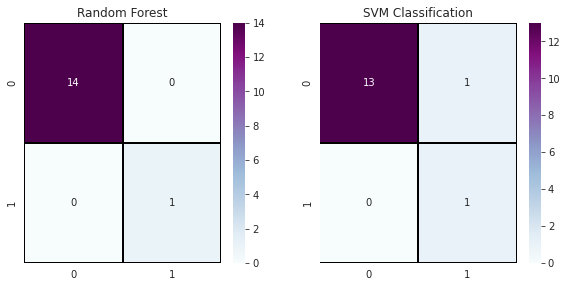

In [ ]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Random Forest') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')


sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='black',cmap="BuPu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='black',cmap="BuPu" ,fmt='g', ax=ax2)
plt.show()